In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


In [2]:
%matplotlib inline
from IPython.core.display import display, HTML, Javascript

# ----- Notebook Theme -----

notebook_theme = 'carrot'
color_maps = {'turquoise': ['#1abc9c', '#e8f8f5', '#d1f2eb', '#a3e4d7', '#76d7c4', '#48c9b0', '#1abc9c', '#17a589', '#148f77', '#117864', '#0e6251'], 'green': ['#16a085', '#e8f6f3', '#d0ece7', '#a2d9ce', '#73c6b6', '#45b39d', '#16a085', '#138d75', '#117a65', '#0e6655', '#0b5345'], 'emerald': ['#2ecc71', '#eafaf1', '#d5f5e3', '#abebc6', '#82e0aa', '#58d68d', '#2ecc71', '#28b463', '#239b56', '#1d8348', '#186a3b'], 'nephritis': ['#27ae60', '#e9f7ef', '#d4efdf', '#a9dfbf', '#7dcea0', '#52be80', '#27ae60', '#229954', '#1e8449', '#196f3d', '#145a32'], 'peter': ['#3498db', '#ebf5fb', '#d6eaf8', '#aed6f1', '#85c1e9', '#5dade2', '#3498db', '#2e86c1', '#2874a6', '#21618c', '#1b4f72'], 'belize': ['#2980b9', '#eaf2f8', '#d4e6f1', '#a9cce3', '#7fb3d5', '#5499c7', '#2980b9', '#2471a3', '#1f618d', '#1a5276', '#154360'], 'amethyst': ['#9b59b6', '#f5eef8', '#ebdef0', '#d7bde2', '#c39bd3', '#af7ac5', '#9b59b6', '#884ea0', '#76448a', '#633974', '#512e5f'], 'wisteria': ['#8e44ad', '#f4ecf7', '#e8daef', '#d2b4de', '#bb8fce', '#a569bd', '#8e44ad', '#7d3c98', '#6c3483', '#5b2c6f', '#4a235a'], 'wet': ['#34495e', '#ebedef', '#d6dbdf', '#aeb6bf', '#85929e', '#5d6d7e', '#34495e', '#2e4053', '#283747', '#212f3c', '#1b2631'], 'midnight': ['#2c3e50', '#eaecee', '#d5d8dc', '#abb2b9', '#808b96', '#566573', '#2c3e50', '#273746', '#212f3d', '#1c2833', '#17202a'], 'sunflower': ['#f1c40f', '#fef9e7', '#fcf3cf', '#f9e79f', '#f7dc6f', '#f4d03f', '#f1c40f', '#d4ac0d', '#b7950b', '#9a7d0a', '#7d6608'], 'orange': ['#f39c12', '#fef5e7', '#fdebd0', '#fad7a0', '#f8c471', '#f5b041', '#f39c12', '#d68910', '#b9770e', '#9c640c', '#7e5109'], 'carrot': ['#e67e22', '#fdf2e9', '#fae5d3', '#f5cba7', '#f0b27a', '#eb984e', '#e67e22', '#ca6f1e', '#af601a', '#935116', '#784212'], 'pumpkin': ['#d35400', '#fbeee6', '#f6ddcc', '#edbb99', '#e59866', '#dc7633', '#d35400', '#ba4a00', '#a04000', '#873600', '#6e2c00'], 'alizarin': ['#e74c3c', '#fdedec', '#fadbd8', '#f5b7b1', '#f1948a', '#ec7063', '#e74c3c', '#cb4335', '#b03a2e', '#943126', '#78281f'], 'pomegranate': ['#c0392b', '#f9ebea', '#f2d7d5', '#e6b0aa', '#d98880', '#cd6155', '#c0392b', '#a93226', '#922b21', '#7b241c', '#641e16'], 'clouds': ['#ecf0f1', '#fdfefe', '#fbfcfc', '#f7f9f9', '#f4f6f7', '#f0f3f4', '#ecf0f1', '#d0d3d4', '#b3b6b7', '#979a9a', '#7b7d7d'], 'silver': ['#bdc3c7', '#f8f9f9', '#f2f3f4', '#e5e7e9', '#d7dbdd', '#cacfd2', '#bdc3c7', '#a6acaf', '#909497', '#797d7f', '#626567'], 'concrete': ['#95a5a6', '#f4f6f6', '#eaeded', '#d5dbdb', '#bfc9ca', '#aab7b8', '#95a5a6', '#839192', '#717d7e', '#5f6a6a', '#4d5656'], 'asbestos': ['#7f8c8d', '#f2f4f4', '#e5e8e8', '#ccd1d1', '#b2babb', '#99a3a4', '#7f8c8d', '#707b7c', '#616a6b', '#515a5a', '#424949']}
# color_maps = {'red': ['#f44336', '#ffebee', '#ffcdd2', '#ef9a9a', '#e57373', '#ef5350', '#f44336', '#e53935', '#d32f2f', '#c62828', '#b71c1c', '#ff8a80', '#ff5252', '#ff1744', '#d50000'], 'pink': ['#e91e63', '#fce4ec', '#f8bbd0', '#f48fb1', '#f06292', '#ec407a', '#e91e63', '#d81b60', '#c2185b', '#ad1457', '#880e4f', '#ff80ab', '#ff4081', '#f50057', '#c51162'], 'purple': ['#9c27b0', '#f3e5f5', '#e1bee7', '#ce93d8', '#ba68c8', '#ab47bc', '#9c27b0', '#8e24aa', '#7b1fa2', '#6a1b9a', '#4a148c', '#ea80fc', '#e040fb', '#d500f9', '#aa00ff'], 'deep': ['#673ab7', '#ede7f6', '#d1c4e9', '#b39ddb', '#9575cd', '#7e57c2', '#673ab7', '#5e35b1', '#512da8', '#4527a0', '#311b92', '#b388ff', '#7c4dff', '#651fff', '#6200ea', '#ff5722', '#fbe9e7', '#ffccbc', '#ffab91', '#ff8a65', '#ff7043', '#ff5722', '#f4511e', '#e64a19', '#d84315', '#bf360c', '#ff9e80', '#ff6e40', '#ff3d00', '#dd2c00'], 'indigo': ['#3f51b5', '#e8eaf6', '#c5cae9', '#9fa8da', '#7986cb', '#5c6bc0', '#3f51b5', '#3949ab', '#303f9f', '#283593', '#1a237e', '#8c9eff', '#536dfe', '#3d5afe', '#304ffe'], 'blue': ['#2196f3', '#e3f2fd', '#bbdefb', '#90caf9', '#64b5f6', '#42a5f5', '#2196f3', '#1e88e5', '#1976d2', '#1565c0', '#0d47a1', '#82b1ff', '#448aff', '#2979ff', '#2962ff', '#607d8b', '#eceff1', '#cfd8dc', '#b0bec5', '#90a4ae', '#78909c', '#607d8b', '#546e7a', '#455a64', '#37474f', '#263238'], 'light': ['#03a9f4', '#e1f5fe', '#b3e5fc', '#81d4fa', '#4fc3f7', '#29b6f6', '#03a9f4', '#039be5', '#0288d1', '#0277bd', '#01579b', '#80d8ff', '#40c4ff', '#00b0ff', '#0091ea', '#8bc34a', '#f1f8e9', '#dcedc8', '#c5e1a5', '#aed581', '#9ccc65', '#8bc34a', '#7cb342', '#689f38', '#558b2f', '#33691e', '#ccff90', '#b2ff59', '#76ff03', '#64dd17'], 'cyan': ['#00bcd4', '#e0f7fa', '#b2ebf2', '#80deea', '#4dd0e1', '#26c6da', '#00bcd4', '#00acc1', '#0097a7', '#00838f', '#006064', '#84ffff', '#18ffff', '#00e5ff', '#00b8d4'], 'teal': ['#009688', '#e0f2f1', '#b2dfdb', '#80cbc4', '#4db6ac', '#26a69a', '#009688', '#00897b', '#00796b', '#00695c', '#004d40', '#a7ffeb', '#64ffda', '#1de9b6', '#00bfa5'], 'green': ['#4caf50', '#e8f5e9', '#c8e6c9', '#a5d6a7', '#81c784', '#66bb6a', '#4caf50', '#43a047', '#388e3c', '#2e7d32', '#1b5e20', '#b9f6ca', '#69f0ae', '#00e676', '#00c853'], 'lime': ['#cddc39', '#f9fbe7', '#f0f4c3', '#e6ee9c', '#dce775', '#d4e157', '#cddc39', '#c0ca33', '#afb42b', '#9e9d24', '#827717', '#f4ff81', '#eeff41', '#c6ff00', '#aeea00'], 'yellow': ['#ffeb3b', '#fffde7', '#fff9c4', '#fff59d', '#fff176', '#ffee58', '#ffeb3b', '#fdd835', '#fbc02d', '#f9a825', '#f57f17', '#ffff8d', '#ffff00', '#ffea00', '#ffd600'], 'amber': ['#ffc107', '#fff8e1', '#ffecb3', '#ffe082', '#ffd54f', '#ffca28', '#ffc107', '#ffb300', '#ffa000', '#ff8f00', '#ff6f00', '#ffe57f', '#ffd740', '#ffc400', '#ffab00'], 'orange': ['#ff9800', '#fff3e0', '#ffe0b2', '#ffcc80', '#ffb74d', '#ffa726', '#ff9800', '#fb8c00', '#f57c00', '#ef6c00', '#e65100', '#ffd180', '#ffab40', '#ff9100', '#ff6d00'], 'brown': ['#795548', '#efebe9', '#d7ccc8', '#bcaaa4', '#a1887f', '#8d6e63', '#795548', '#6d4c41', '#5d4037', '#4e342e', '#3e2723'], 'grey': ['#9e9e9e', '#fafafa', '#f5f5f5', '#eeeeee', '#e0e0e0', '#bdbdbd', '#9e9e9e', '#757575', '#616161', '#424242', '#212121'], 'white': ['#ffffff'], 'black': ['#000000']}

color_maps = {i: color_maps[i] for i in color_maps if i not in ['clouds', 'silver', 'concrete', 'asbestos', 'wet asphalt', 'midnight blue', 'wet']}

CMAP = 'Oranges'
prompt = '#1DBCCD'
main_color = '#E58F65' # color_maps[notebook_theme]
strong_main_color = '#EB9514' # = color_maps[notebook_theme] 
custom_colors = [strong_main_color, main_color]

# ----- Notebook Theme -----

html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
        <link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Raleway">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Oswald">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open Sans">
        <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
        <style>
        .title-section{
            font-family: "Oswald", Arial, sans-serif;
            font-weight: bold;
            color: "#6A8CAF";
            letter-spacing: 6px;
        }
        hr { border: 1px solid #E58F65 !important;
             color: #E58F65 !important;
             background: #E58F65 !important;
           }
        body {
            font-family: "Open Sans", sans-serif;
            }        
        </style>
    </head>    
</html>
"""

HTML(html_contents)

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

#Data Exploration

In [5]:
df = pd.read_csv("../input/wine-quality-dataset/WineQT.csv")

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
df.shape

(1143, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


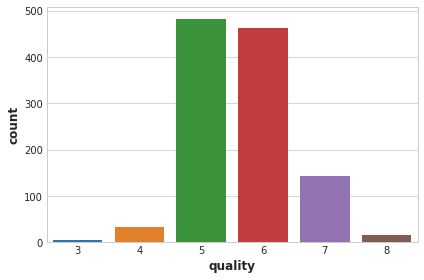

In [9]:
sns.countplot(df['quality'],label="Count")
plt.show()

In [10]:
df.corr().style.background_gradient(cmap = CMAP)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [11]:
df.describe().T.style.background_gradient(cmap = CMAP)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


#Data Preprocessing

In [12]:
df = df.drop(columns=['Id'])
#df.head()

In [13]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
46,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
64,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
65,7.7,0.490,0.26,1.90,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5
71,8.1,0.545,0.18,1.90,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1076,7.5,0.380,0.57,2.30,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,6
1113,7.8,0.600,0.26,2.00,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1114,7.8,0.600,0.26,2.00,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1116,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5


In [14]:
df = df.drop_duplicates()

In [15]:
df.corr().style.background_gradient(cmap = CMAP)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.236894,0.668178,0.173726,0.102446,-0.152582,-0.100716,0.683120,-0.692597,0.181277,-0.077624,0.115826
volatile acidity,-0.236894,1.000000,-0.542459,-0.008701,0.051371,-0.007556,0.071870,0.028614,0.226348,-0.280601,-0.207419,-0.409340
citric acid,0.668178,-0.542459,1.000000,0.178362,0.246843,-0.048523,0.047903,0.368832,-0.553370,0.347933,0.102134,0.241565
residual sugar,0.173726,-0.008701,0.178362,1.000000,0.058410,0.146929,0.188528,0.363112,-0.120993,0.006738,0.070779,0.022718
chlorides,0.102446,0.051371,0.246843,0.058410,1.000000,0.014612,0.044947,0.210932,-0.277536,0.392989,-0.234283,-0.122214
free sulfur dioxide,-0.152582,-0.007556,-0.048523,0.146929,0.014612,1.000000,0.661089,-0.049664,0.051018,0.031844,-0.060876,-0.071083
total sulfur dioxide,-0.100716,0.071870,0.047903,0.188528,0.044947,0.661089,1.000000,0.053496,-0.071037,0.004963,-0.197917,-0.182214
density,0.683120,0.028614,0.368832,0.363112,0.210932,-0.049664,0.053496,1.000000,-0.366173,0.138789,-0.504748,-0.185187
pH,-0.692597,0.226348,-0.553370,-0.120993,-0.277536,0.051018,-0.071037,-0.366173,1.000000,-0.192979,0.230655,-0.057592
sulphates,0.181277,-0.280601,0.347933,0.006738,0.392989,0.031844,0.004963,0.138789,-0.192979,1.000000,0.096239,0.257519


In [16]:
df.describe().T.style.background_gradient(cmap = CMAP)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1018.000000,8.288507,1.741324,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1018.000000,0.533541,0.183167,0.120000,0.390000,0.520000,0.645000,1.580000
citric acid,1018.000000,0.268802,0.196229,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1018.000000,2.524411,1.314850,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1018.000000,0.087187,0.048506,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1018.000000,15.648821,10.176525,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1018.000000,46.325639,33.123533,6.000000,21.000000,38.000000,62.000000,289.000000
density,1018.000000,0.996700,0.001916,0.990070,0.995572,0.996665,0.997827,1.003690
pH,1018.000000,3.311503,0.157775,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1018.000000,0.656817,0.167542,0.330000,0.550000,0.620000,0.720000,2.000000


In [17]:
#df1 = df.loc[(df.quality == 3) | (df.quality == 4) ]
#df2 = df1.loc[:, ['alcohol','quality']]
#df2.head()
#sns.scatterplot(x=df['alcohol'], y=df['quality'])

#Data Manipulation

In [18]:
#scaler = MinMaxScaler(feature_range = (0 , 1))

X = df.drop('quality', axis=1)
y = df['quality']

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# list discrete features that have integer dtypes for using MI (Mutual Information)
discrete_features = X.dtypes == int

#Feature Selection

In [19]:
#use mutual information classify to select mutual feature
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

alcohol                 0.192677
sulphates               0.091077
volatile acidity        0.089112
total sulfur dioxide    0.067142
density                 0.045774
citric acid             0.045762
fixed acidity           0.042099
free sulfur dioxide     0.028556
chlorides               0.019796
pH                      0.015128
residual sugar          0.008783
Name: MI Scores, dtype: float64

In [20]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0.05]

X = drop_uninformative(X, mi_scores)

#Clustering

In [21]:
#Cluster the dataset to create new feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

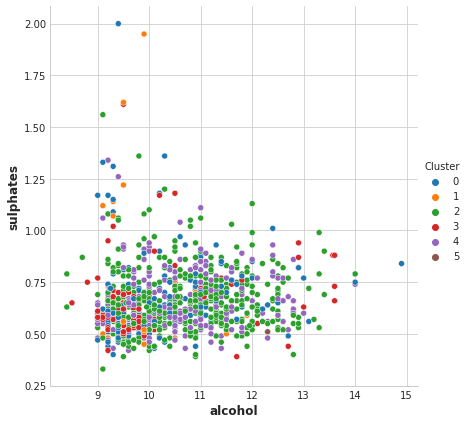

In [22]:
sns.relplot(
    x="alcohol", y="sulphates", hue="Cluster", data= X, height=6,
);

#Model Building

In [23]:
from sklearn.tree import DecisionTreeClassifier as dtc

decision_tree = dtc(random_state=0)
decision_tree.fit(X,y)

predict = cross_val_predict(estimator = decision_tree, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.07      0.09      0.08        33
           5       0.60      0.56      0.58       433
           6       0.47      0.47      0.47       409
           7       0.30      0.32      0.31       122
           8       0.09      0.13      0.11        15

    accuracy                           0.47      1018
   macro avg       0.26      0.26      0.26      1018
weighted avg       0.49      0.47      0.48      1018



In [24]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(X, y)
predict = cross_val_predict(estimator = random_forest, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        33
           5       0.64      0.70      0.67       433
           6       0.53      0.58      0.56       409
           7       0.44      0.32      0.37       122
           8       0.17      0.07      0.10        15

    accuracy                           0.57      1018
   macro avg       0.30      0.28      0.28      1018
weighted avg       0.54      0.57      0.56      1018



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X,y)
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.14      0.03      0.05        33
           5       0.55      0.69      0.61       433
           6       0.44      0.44      0.44       409
           7       0.29      0.14      0.19       122
           8       0.00      0.00      0.00        15

    accuracy                           0.49      1018
   macro avg       0.24      0.22      0.21      1018
weighted avg       0.45      0.49      0.46      1018



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.svm import SVC

scv = SVC(gamma='auto')
scv.fit(X,y)
predict = cross_val_predict(estimator = scv, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        33
           5       0.56      0.65      0.60       433
           6       0.45      0.54      0.49       409
           7       0.19      0.04      0.07       122
           8       0.00      0.00      0.00        15

    accuracy                           0.50      1018
   macro avg       0.20      0.21      0.19      1018
weighted avg       0.44      0.50      0.46      1018



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
gnb = GaussianNB()
gnb.fit(X,y)
predict = cross_val_predict(estimator = gnb, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.10      0.03      0.05        33
           5       0.66      0.71      0.68       433
           6       0.55      0.61      0.58       409
           7       0.52      0.37      0.43       122
           8       0.00      0.00      0.00        15

    accuracy                           0.59      1018
   macro avg       0.31      0.29      0.29      1018
weighted avg       0.57      0.59      0.58      1018



#Save Model

In [28]:
# Saving the model
#import pickle
#pickle.dump(gnb, open('qualityWine_clf.pkl', 'wb'))